In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
train_df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/seoulgeotrain2.csv')

In [22]:
test_df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/seoulgeotest.csv')

In [39]:
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu2,126.900000,37.570000,Gangseo
5,Mapo-gu,126.908728,37.560229,Gangseo
6,Seodaemun-gu,126.936800,37.579100,Gangseo
7,Gwanak-gu,126.915065,37.487517,Gangseo
8,Dongjak-gu,126.939300,37.512400,Gangseo
9,Seocho-gu,127.032400,37.483700,Gangnam


In [23]:
# Problem: Given location parameters, identify the Han river regions (ie, gang-nam, gang-seo, gang-buk, and gang-dong)

# Data Visualizaiton

C:\Users\kimta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Four major areas and its districts')

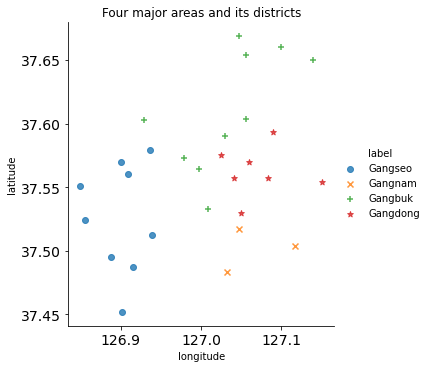

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('longitude', 'latitude', data=train_df, fit_reg=False,
          markers=["o", "x", "+", "*"], hue="label")

plt.title('Four major areas and its districts')

# Split (1) feature vs label datasets and (2) train vs test

In [25]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

# Run a tree-decision ML

In [26]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Define a function of coloring four regions

In [27]:
def display_decision_surface(clf,X, y):
    
    # 차트 범위 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


    # 학습 데이터를 차트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, 
                    X.loc[idx].latitude, 
                    c=color, 
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=200)

    # 차트 제목
    plt.title("Using a decision tree to predict regions",fontsize=16)
    # 차트 레전드
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축
    plt.xlabel('longitude',fontsize=16)
    # y축
    plt.ylabel('latitude',fontsize=16)
    # 차트 크기/폰트 설정
    plt.rcParams["figure.figsize"] = [7,5]
    plt.rcParams["font.size"] = 14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14
    # 차트 그리기
    plt.show()

In [28]:
# transform 'labels' to numbers using LabelEncoder
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
y_encoded

C:\Users\kimta\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0])

C:\Users\kimta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


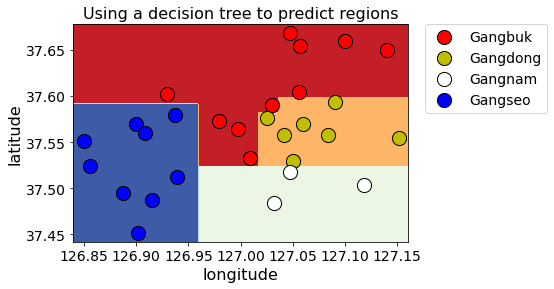

In [29]:
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

# Visualizing decision trees

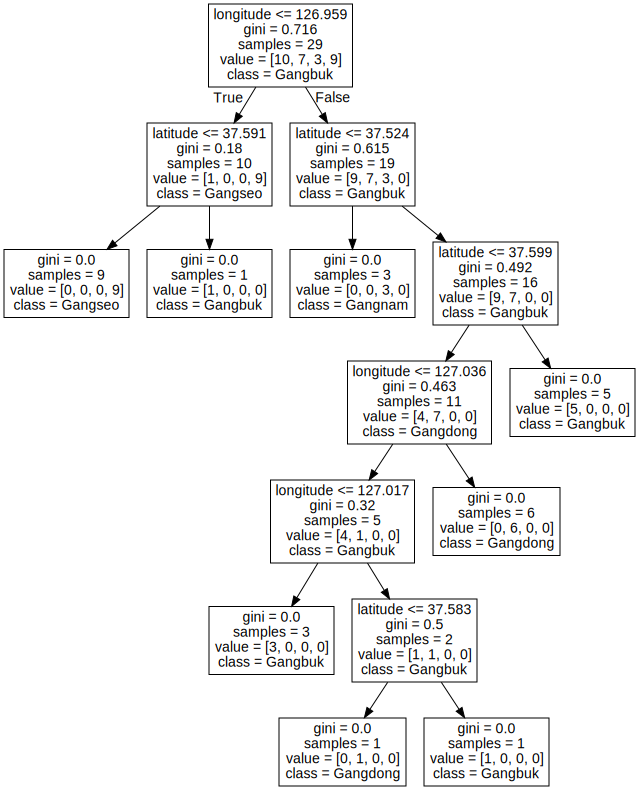

In [30]:
import graphviz
dot_data = tree.export_graphviz(clf, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 
                                      'Gangdong', 'Gangnam', 'Gangseo'],)  
                      
graph = graphviz.Source(dot_data)  
graph

# Model test 1 (self testing)

In [31]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [32]:
print(f"accuracy score is {accuracy_score(y_test.values.ravel(),le.classes_[pred]):.3f}")

accuracy score is 1.000


In [33]:
comparison = pd.DataFrame({'prediction':le.classes_[pred],
                           'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


# Model test 2 (external testing)

In [34]:
test2_df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/stoursites2.csv')

In [35]:
X_test2 = test2_df[['longitude', 'latitude']]
y_test2 = test2_df[['label']]

In [36]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test2)

In [37]:
print(f"accuracy score is {accuracy_score(y_test2.values.ravel(), le.classes_[pred]):.3f}")

accuracy score is 1.000


In [38]:
comparison = pd.DataFrame({'prediction':le.classes_[pred], 'ground_truth':y_test2.values.ravel()}) 
comparison

,prediction,ground_truth
0,Gangbuk,Gangbuk
1,Gangbuk,Gangbuk
2,Gangbuk,Gangbuk
3,Gangbuk,Gangbuk
4,Gangbuk,Gangbuk
5,Gangbuk,Gangbuk
6,Gangbuk,Gangbuk
7,Gangbuk,Gangbuk
8,Gangbuk,Gangbuk
9,Gangdong,Gangdong
